In [1]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
import pandas as pd
import numpy as np

D:\Anaconda3\envs\machinelearn\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data_fram = pd.read_csv('./data/Features.csv')
data_fram.head()

,dates,OBJs,ODs_1,ODs_2,depTimes,expPerf,staticPerf,grdyPerf,godPerf,distances,...,stmutC_grdyPath_3,YesterdayGrdyPerf,YesterdayGodPerf,YesterdayStaPerf,YesterdayExpPerf,Outputs14,Outputs7,Outputs3_1,Outputs3_2,Outputs3_3
0,4.19,1,1386,1821,16454,901.873155,943.341039,879.878944,802.674362,0.089257,...,0.475829,999.074209,955.166635,997.787702,986.738929,13,6,-1,0,-1
1,4.19,1,529,1199,14062,905.320230,650.077643,650.077643,650.077643,0.053294,...,0.550532,667.675168,585.119637,655.264699,585.119637,2,2,1,1,-1
2,4.19,1,716,990,13779,787.775655,864.166706,925.812156,767.183548,0.080272,...,0.756983,612.851744,601.668111,975.484821,700.256755,14,7,-1,-1,0
3,4.19,1,547,1456,14027,625.313098,683.213117,670.375942,623.874198,0.063568,...,0.512717,670.883400,641.749020,670.883400,641.749020,14,7,-1,-1,0
4,4.19,1,914,1073,14355,604.748398,618.476141,620.277530,595.945774,0.047176,...,0.289439,590.331899,590.331899,657.448103,611.118098,14,7,-1,-1,0


In [3]:
Date = data_fram['dates']
Date = pd.get_dummies(Date)

In [4]:
Data = data_fram[['expPerf ', 'OBJs', 'ODs_1', 'ODs_2', 'depTimes', 'distances', 'CR_expPath', 'averObjValue_expPath', 'VAR_expPath', 
                  'staVAR_expPath', 'mutC_expPath', 'averTT_expPath_1', 'averTT_expPath_2', 'averTT_expPath_3', 'strTT_expPath_1', 
                  'strTT_expPath_2', 'strTT_expPath_3', 'VAR_expPath_1', 'VAR_expPath_2', 'VAR_expPath_3', 'staVAR_expPath_1', 
                  'staVAR_expPath_2', 'staVAR_expPath_3', 'mutC_expPath_1', 'mutC_expPath_2', 'mutC_expPath_3', 'stVAR_expPath_1', 
                  'stVAR_expPath_2', 'stVAR_expPath_3','ststaVAR_expPath_1', 'ststaVAR_expPath_2', 'ststaVAR_expPath_3', 
                  'stmutC_expPath_1', 'stmutC_expPath_2', 'stmutC_expPath_3', 'YesterdayExpPerf']]
Data1 = Data.join(Date)
Data1 = Data.as_matrix()
X = Data1[:, 1:].astype(float)
Y = Data1[:, 0]

D:\Anaconda3\envs\machinelearn\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=32, test_size=0.2)

In [6]:
from sklearn.preprocessing import minmax_scale
X_train_std = minmax_scale(x_train)
X_test_std = minmax_scale(x_test)
#X_train_std = standar_s.fit_transform(x_train)
#X_test_std = standar_s.fit_transform(x_test)

In [7]:
def create_model_1():
    model = Sequential()
    model.add(Dense(units=512, kernel_initializer='random_normal',input_dim=X_train_std.shape[1]))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=256, kernel_initializer='random_normal'))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=128, kernel_initializer='random_normal'))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(units=64, kernel_initializer='random_normal'))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(units=32, kernel_initializer='random_normal'))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error',
                  optimizer='adam',
                  metrics=['mae'])
    return model

In [8]:
a_model_1 = create_model_1()
#a_model_1.fit(X_train_std, y_train, epochs=20, batch_size=256,verbose=1,validation_split=0.2,shuffle=True)

In [9]:
from keras.callbacks import TensorBoard
a_model_1.fit(X_train_std, y_train, epochs=25, batch_size=64,verbose=0,
              validation_split=0.2,shuffle=True,callbacks=[TensorBoard(log_dir='./logs/{}'.format("EDA4_20180902_4"))])

In [10]:
Predict = a_model_1.predict(X_test_std)

In [11]:
Predict.shape

(20384, 1)

In [12]:
y_test.shape

(20384,)

In [13]:
Predict_y_test_abs_error =  abs(Predict - y_test.reshape(-1, 1))

In [15]:
np.mean(Predict_y_test_abs_error)

118.57441385169518

In [17]:
np.mean(Predict)

1171.0242

In [18]:
np.mean(y_test)

1091.2422853404832

# 画图分析

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

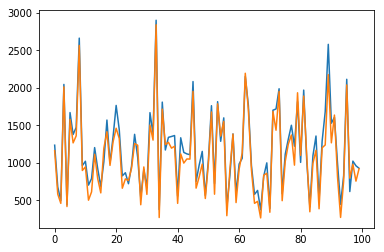

In [27]:
plt.plot(range(Predict.shape[0])[:100],Predict[:100],y_test[:100])

# 设定阈值分析

In [28]:
threshold = 5

In [31]:
np.mean(Predict_y_test_abs_error<threshold)

0.02315541601255887

In [38]:
out_list = []
for t in range(0, 250, 5):
    out_list.append(np.mean(Predict_y_test_abs_error<t))

In [39]:
out_list

[0.0,
 0.02315541601255887,
 0.04439756671899529,
 0.06799450549450549,
 0.08904042386185243,
 0.11150902668759811,
 0.13505690737833595,
 0.1600765306122449,
 0.18656789638932497,
 0.21212715855572997,
 0.23729395604395603,
 0.2620192307692308,
 0.2867445054945055,
 0.3133339874411303,
 0.33918759811616955,
 0.3656789638932496,
 0.39104199372056514,
 0.41925039246467816,
 0.4474097331240188,
 0.47547095761381475,
 0.502109497645212,
 0.5294839089481946,
 0.5559752747252747,
 0.5808477237048666,
 0.6060145211930926,
 0.6289246467817896,
 0.6519328885400314,
 0.6753826530612245,
 0.695054945054945,
 0.7146291208791209,
 0.7321428571428571,
 0.7483320251177394,
 0.7641287284144427,
 0.7792876766091051,
 0.7936616954474097,
 0.8072507849293563,
 0.8194171899529042,
 0.8303571428571429,
 0.8406593406593407,
 0.8492935635792779,
 0.8588108320251178,
 0.8671507064364207,
 0.8750981161695447,
 0.8816718995290423,
 0.8884909733124019,
 0.8949666405023547,
 0.8994799843014128,
 0.90521978021978

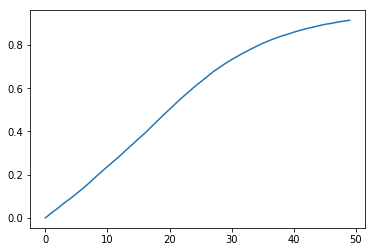

In [42]:
plt.plot(range(len(out_list)),out_list)